Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy.stats import norm, normaltest
#from sklearn.model_selection import train_test_split
from sklearn import set_config


In [3]:
from sklearn.datasets import load_boston

In [4]:
df_base = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/train.csv')
#df_tar = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Kurs_project_task/train.csv')
# df = pd.read_csv('/home/mikhail/Рабочий стол/Geek_Script_2605/Geek_Home_DC/creditcard.csv')

In [5]:
df_base.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
df_base.keys()

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [7]:
# feature_names = df_base['Id'], ['DistrictId'], ['Rooms'], ['Square'], ['LifeSquare'], ['KitchenSquare'],['Floor'], ['HouseFloor'], ['HouseYear'], ['Ecology_1'], ['Social_1'], ['Social_2'],['Social_3'], ['Helthcare_2'],['Shops_1'], ['Price'],['Ecology_2_A'],['Ecology_2_B'], ['Ecology_3_A'], ['Ecology_3_B'], ['Shops_2_A'], ['Shops_2_B']
feature_names = df_base.keys()

feature_names

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

Причесываем df_base


In [8]:
df_base.loc[df_base['LifeSquare'].isnull(), 'LifeSquare2'] = df_base['Square']

In [9]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
LifeSquare2      2113 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 1.6+ MB


In [10]:
df_base = df_base.loc[:, list(df_base.columns[:5]) + ['LifeSquare2'] + list(df_base.columns[5:-1])]

In [11]:
df_base.loc[df_base['LifeSquare'].isnull(), 'LifeSquare'] = df_base['Square'] - 3

In [12]:
df_base['Healthcare_1'] = df_base['Healthcare_1'].fillna(-999)

In [13]:
df_base = df_base.drop('LifeSquare2', axis=1)

In [14]:
df_base.drop('Healthcare_1', axis=1, inplace=True)

In [15]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [16]:
df_base = pd.get_dummies(df_base)
df_base.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [17]:
# df_base = df_base.astype('int') #df['A'].astype('float')

In [18]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dtypes: float64(7), int64(9), uint8(6)
mem

In [19]:
df_base.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,1.000000,0.012973,-0.005847,-0.010071,0.012864,0.019880,0.001348,-0.008376,0.005004,0.018097,...,-0.009358,0.001502,-0.008718,0.009880,-0.003099,0.003099,0.005408,-0.005408,-0.003645,0.003645
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.043978,0.040358,-0.120373,-0.149051,0.013430,0.065294,...,0.136095,0.306147,0.174214,0.265100,0.093406,-0.093406,0.027902,-0.027902,0.021018,-0.021018
Rooms,-0.005847,0.071432,1.000000,0.662893,0.149181,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,...,0.012811,0.063557,0.053618,0.550291,0.001971,-0.001971,0.005909,-0.005909,0.000146,-0.000146
Square,-0.010071,-0.026613,0.662893,1.000000,0.244232,0.008320,0.114791,0.081505,-0.009032,-0.064479,...,0.035241,-0.022960,0.021357,0.520075,-0.029926,0.029926,-0.022748,0.022748,0.049380,-0.049380
LifeSquare,0.012864,-0.043978,0.149181,0.244232,1.000000,-0.010519,0.035819,0.020830,-0.002726,-0.030678,...,0.013186,-0.046321,-0.018892,0.080774,-0.011100,0.011100,-0.017649,0.017649,0.018417,-0.018417
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.010519,1.000000,-0.011397,0.000780,0.000958,-0.005622,...,-0.015140,0.043170,0.010216,0.028864,-0.000268,0.000268,0.007919,-0.007919,0.017315,-0.017315
Floor,0.001348,-0.120373,-0.000665,0.114791,0.035819,-0.011397,1.000000,0.418986,0.000928,-0.016133,...,-0.002237,-0.065537,0.024264,0.128715,-0.049661,0.049661,-0.025767,0.025767,0.013626,-0.013626
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.020830,0.000780,0.418986,1.000000,-0.000864,-0.004362,...,-0.008137,-0.068728,0.026279,0.088280,-0.059347,0.059347,-0.009258,0.009258,-0.051002,0.051002
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002726,0.000958,0.000928,-0.000864,1.000000,0.001465,...,0.000819,0.011245,0.003681,0.004305,-0.000997,0.000997,-0.001686,0.001686,-0.002994,0.002994
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.030678,-0.005622,-0.016133,-0.004362,0.001465,1.000000,...,-0.124068,0.030873,-0.076749,-0.058381,0.110725,-0.110725,0.223197,-0.223197,-0.079809,0.079809


In [20]:
df_base['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [21]:
target = df_base['Price']
target

0       184966.930730
1       300009.450063
2       220925.908524
3       175616.227217
4       150226.531644
5       215898.447742
6       296021.204377
7       221244.156664
8       229102.795999
9        95380.220993
10      204243.553129
11      165534.541425
12      229220.372609
13      252481.908323
14      140647.565937
15       89084.327876
16      117000.381287
17      231828.437667
18      183743.230464
19      394895.325987
20      521919.057400
21      127200.026511
22      215083.969056
23      571069.052600
24      241718.099527
25      244145.827069
26      337299.867936
27      173910.923723
28       95338.198549
29      213374.166403
            ...      
9970    220804.817110
9971    228845.682509
9972    222068.370598
9973    197405.312185
9974     65949.315881
9975    190325.071232
9976    175229.645872
9977    174497.101781
9978    185996.664227
9979    339230.931543
9980    203000.197806
9981    242356.408174
9982    177449.715863
9983    164356.212221
9984    22

                       Ощущение, что "Х" у меня с неполными параметрами:

In [22]:
X = pd.DataFrame(df_base, columns=['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
              'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2','Social_3', 
              'Helthcare_2', 'Shops_1'])

X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
dtypes: float64(6), int64(9)
memory usage: 1.1 MB


                                          !!!!!ИЗМЕНЕН ТИП !!!!!!!

In [23]:
X = X.astype('float') #df['A'].astype('float')a


In [24]:
# y = pd.DataFrame(target, columns=['Price']).astype('float')
y = pd.DataFrame(target).astype('float')
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
Price    10000 non-null float64
dtypes: float64(1)
memory usage: 78.2 KB


In [25]:
# X.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)

                                         Делаем тренировочную модель

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_test


,Price
879,440809.074279
5182,162336.721266
6338,237651.014349
7768,178667.155898
6446,443720.429241
2311,323796.265107
2657,171040.787491
1208,247894.556951
7883,311895.441450
519,372016.922629


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()


In [30]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred = lr.predict(X_test)

y_pred.shape

(2500, 1)

In [32]:
check_test = pd.DataFrame({
    "y_test": y_test['Price'],
    "y_pred": y_pred.flatten(),
})

check_test.head()

,y_test,y_pred
879,440809.074279,266320.902170
5182,162336.721266,129588.588911
6338,237651.014349,249904.489823
7768,178667.155898,132497.195479
6446,443720.429241,348219.192954


In [33]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
879,440809.074279,266320.902170,-174488.172109
5182,162336.721266,129588.588911,-32748.132356
6338,237651.014349,249904.489823,12253.475474
7768,178667.155898,132497.195479,-46169.960419
6446,443720.429241,348219.192954,-95501.236288


                                            Смотрим среднюю квадратичную ошибку

In [34]:
mse1 = (check_test["error"] ** 2).mean()

mse1

4443057479.770047

                                              Смотрим абсолютную ошибку

In [35]:
(np.abs(check_test["error"])).mean()

45510.745246361694

In [36]:
lr.intercept_

array([-6626.8963809])

In [37]:
lr.coef_

array([[ 1.71852664e-01,  4.18714316e+02,  3.34930425e+04,
         1.42995145e+03, -2.16343161e+01,  4.00455153e+00,
         1.83001782e+03,  1.01458025e+03,  2.81686927e-03,
        -3.46958840e+04,  1.42733402e+03, -1.97027833e+00,
         4.85323180e+01,  6.87296307e+03, -8.98351421e+02]])

                            Просмотр коэффициентов линейной регрессии

                                            𝑤0

In [38]:
lr.intercept_

array([-6626.8963809])

In [39]:
lr.coef_

array([[ 1.71852664e-01,  4.18714316e+02,  3.34930425e+04,
         1.42995145e+03, -2.16343161e+01,  4.00455153e+00,
         1.83001782e+03,  1.01458025e+03,  2.81686927e-03,
        -3.46958840e+04,  1.42733402e+03, -1.97027833e+00,
         4.85323180e+01,  6.87296307e+03, -8.98351421e+02]])

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

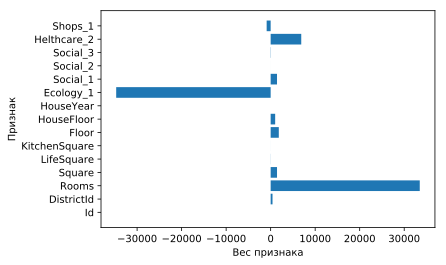

In [41]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

                                        Стандартизация признаков

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [46]:
X_test_scaled = scaler.transform(X_test)

In [47]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [48]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Признак')

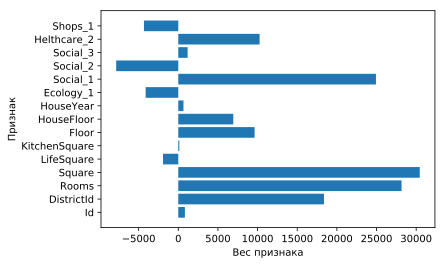

In [49]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

Предположения:
-Площадь, количество комнат, район проживания, это самые важные критерии при формировании цены


In [50]:
feats = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
              'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2','Social_3', 
              'Helthcare_2', 'Shops_1']

In [51]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred=model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [52]:
y_pred

array([[266320.90217048],
       [129588.58891052],
       [249904.48982286],
       ...,
       [159291.34021131],
       [262981.65249126],
       [194134.81633942]])

In [53]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

4443057479.770018

In [54]:
# Сверяем с исходной ошибкой
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

4443057479.770045

                               Линейная регрессия с регуляризацией
 "... Такой метод часто используется для отбора признаков: у менее ценных признаков гораздо раньше обнуляются веса."

In [55]:
from sklearn.linear_model import Lasso, Ridge

In [56]:
# Параметр alpha отвечает за регуляризацию
model = Lasso(alpha=0.03)

In [57]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

4443058638.752017

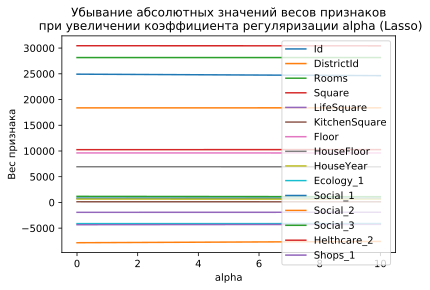

In [58]:
n = 100
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha = val)
    lasso.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

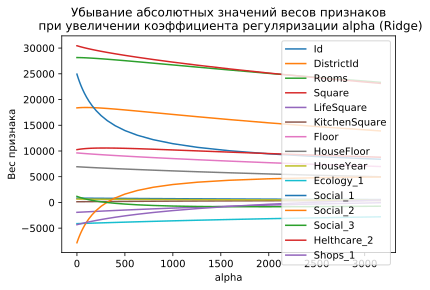

In [59]:
n=66
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha = val)
    ridge.fit(X_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

                                     Метод соседей

In [60]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = RobustScaler()
cols_for_scaling = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
              'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2','Social_3', 
              'Helthcare_2', 'Shops_1']

X_train[cols_for_scaling] = scaler.fit_transform(X_train[cols_for_scaling])
X_valid[cols_for_scaling] = scaler.transform(X_valid[cols_for_scaling])

In [62]:
X_train[cols_for_scaling].describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,-0.001191,0.275745,-0.112400,0.153623,2.095478e-01,0.052167,0.187850,-0.170700,99.323551,0.256045,-0.008796,0.013361,1.205547,0.154733,0.251840
std,0.580116,0.780368,0.840234,0.839263,3.707835e+00,4.108778,0.654577,0.854206,8574.731735,0.668363,0.587584,0.702711,4.765047,0.744288,0.963935
min,-1.000478,-0.625000,-2.000000,-2.070067,-1.517659e+00,-0.750000,-0.750000,-1.750000,-2.407407,-0.408034,-0.833333,-0.894111,-0.400000,-0.500000,-0.600000
25%,-0.503045,-0.285714,-1.000000,-0.445331,-4.633792e-01,-0.625000,-0.375000,-0.625000,-0.111111,-0.308244,-0.633333,-0.650183,-0.400000,-0.500000,-0.400000
50%,0.000000,0.000000,0.000000,0.000000,1.485808e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.496955,0.714286,0.000000,0.554669,5.366208e-01,0.375000,0.625000,0.375000,0.888889,0.691756,0.366667,0.349817,0.600000,0.500000,0.600000
max,1.005135,3.107143,17.000000,22.786474,3.113185e+02,251.000000,4.375000,12.875000,742593.851852,2.542998,1.633333,2.410973,27.800000,2.500000,4.000000


In [63]:
k_values = np.arange(1, 11)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 2 == 0:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

/home/mikhail/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


ValueError: Unknown label type: 'continuous'

In [ ]:
plt.plot(k_values, accuracy_on_valid, label="valid")
plt.plot(k_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [ ]:
?np.arange


                                !!!!!!   Изменен тип для этой модели  !!!!!